<a href="https://colab.research.google.com/github/Deekshapoornashri25/python5731/blob/master/In_class_exercise_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The eighth in-class-exercise (20 points in total, 10/29/2020)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [16]:

# Write your code here
import pandas as pd
df = pd.read_csv('/content/SentimentReview.csv')
df.head()

,Document_ID,Content_Text,Sentiment
0,0,amaz movi exist,Positive
1,1,went second time watch,Positive
2,2,psycholog studi rather superhero flick,Positive
3,3,joaquin oscar joker best dark suspens thriller...,Positive
4,4,venic review,Neutral


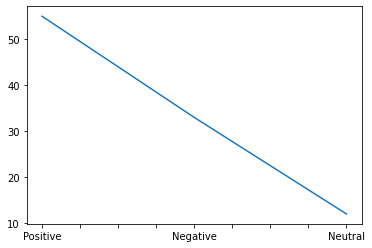

In [17]:
import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='line')

In [18]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
stop = stopwords.words('english')


df['Content_Text'] = df['Content_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Content_Text'] = df['Content_Text'].apply(lambda  x: " ".join(x for x in x.split() if x not in string.punctuation))
df['Content_Text'] = df['Content_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Content_Text'] = df['Content_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Document_ID,Content_Text,Sentiment
0,0,amaz movi exist,Positive
1,1,went second time watch,Positive
2,2,psycholog studi rather superhero flick,Positive
3,3,joaquin oscar joker best dark suspens thriller...,Positive
4,4,venic review,Neutral


In [21]:

from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['Content_Text']:
  words_sentence.append(word_tokenize(sentence))
words_sentence[:5]

[['amaz', 'movi', 'exist'],
 ['went', 'second', 'time', 'watch'],
 ['psycholog', 'studi', 'rather', 'superhero', 'flick'],
 ['joaquin',
  'oscar',
  'joker',
  'best',
  'dark',
  'suspens',
  'thriller',
  'darker',
  'dark',
  'knight'],
 ['venic', 'review']]

In [22]:

import itertools
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))
iterations[:5]

['amaz', 'movi', 'exist', 'went', 'second']

In [23]:
sentiment_list = df.to_records(index=False)
sentiment_list = list(sentiment_list)
sentiment_list[:5]

[(0, 'amaz movi exist', 'Positive'),
 (1, 'went second time watch', 'Positive'),
 (2, 'psycholog studi rather superhero flick', 'Positive'),
 (3, 'joaquin oscar joker best dark suspens thriller darker dark knight', 'Positive'),
 (4, 'venic review', 'Neutral')]

In [24]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in iterations:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [48]:
featuresets = [(document_features(z) ) for (z) in sentiment_list]
train_set, test_set = featuresets[:5], featuresets[5:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

ValueError: ignored

## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [50]:
# Write your code here


!pip install vaderSentiment
# Your analysis here



     |████████████████████████████████| 133kB 2.8MB/s 


In [51]:
from textblob import TextBlob
polar=[]
for i in df['Content_Text']:
  blob = TextBlob(i)
  for sentence in blob.sentences:
    polar.append(sentence.sentiment.polarity)
neutral=0
pos=0
neg=0
for i in polar:
  if i==0.0:
    neutral+=1
  elif i>0:
    pos+=1
  else: neg+=1


print("positive",pos)
print("negative",neg)
print("neutral",neutral)

positive 36
negative 7
neutral 56


In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
for i in df['Content_Text'][:5]:
  sentiment_analyzer_scores(i)

amaz movi exist------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
went second time watch------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
psycholog studi rather superhero flick-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
joaquin oscar joker best dark suspens thriller darker dark knight {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7269}
venic review---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [54]:
train=df[:80]
test=df[80:]
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['Content_Text'])
test_vectors = vectorizer.transform(test['Content_Text'])

In [57]:

import time
from sklearn import svm
from sklearn.metrics import classification_report

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train['Sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['Sentiment'], prediction_linear, output_dict=True)
print('Positive: ', report['Positive'])
print('Negative: ', report['Negative'])
print("Neutral:", report['Neutral'])

Training time: 0.006671s; Prediction time: 0.000413s
Positive:  {'precision': 0.5555555555555556, 'recall': 0.9090909090909091, 'f1-score': 0.6896551724137931, 'support': 11}
Negative:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6}
Neutral: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
